# Medical Cost Personal Insurance Project

In [1]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sklearn

In [2]:
dataset = pd.read_csv(r"C:\Users\HP\Downloads\medical_cost_insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


EDA

In [3]:
dataset.shape

(1338, 7)

In [4]:
dataset.drop_duplicates(inplace=True)
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataset.shape

(1337, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [7]:
print(dataset['sex'].unique())
print(dataset['smoker'].unique())
print(dataset['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [8]:
dataset.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# Observetion
* No null value in data set
* mean and median are aproximatly equal thet why data is not skewed

In [9]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
dataset['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [11]:
dataset['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [12]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [13]:
colnames = dataset.select_dtypes(include=np.number).columns.tolist()
colnames

['age', 'bmi', 'children', 'charges']

In [14]:
col_obj = list(dataset.select_dtypes(include=['object']).columns)
col_obj

['sex', 'smoker', 'region']

In [15]:
from sklearn.preprocessing import LabelEncoder
lb =LabelEncoder()

In [16]:
for i in col_obj:
    dataset[i] = lb.fit_transform(dataset[i])

In [17]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


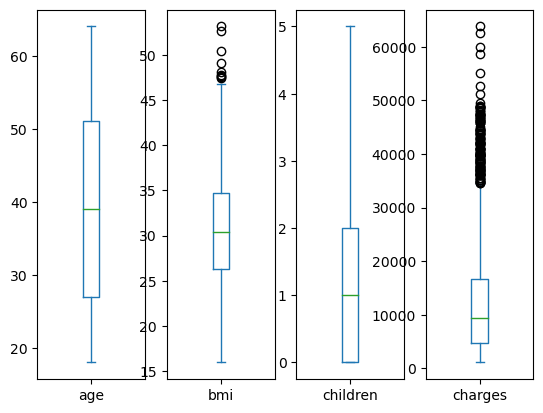

In [18]:
dataset.drop(['sex', 'smoker', 'region'],axis=1).plot(kind='box',subplots = True )
plt.show()

In [19]:
from scipy.stats import zscore

In [20]:
z = np.abs(zscore(dataset.drop("charges",axis=1)))
z.head()

,age,sex,bmi,children,smoker,region
0,1.440418,1.009771,0.453160,0.909234,1.969660,1.343163
1,1.511647,0.990324,0.509422,0.079442,0.507702,0.438017
2,0.799350,0.990324,0.383155,1.580143,0.507702,0.438017
3,0.443201,0.990324,1.305052,0.909234,0.507702,0.467128
4,0.514431,0.990324,0.292456,0.909234,0.507702,0.467128


In [21]:
np.where(z>3)

(array([  32,   71,  116,  166,  413,  425,  438,  568,  639,  846,  876,
         931,  936,  968,  983, 1046, 1084, 1115, 1129, 1244, 1271, 1316],
       dtype=int64),
 array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2],
       dtype=int64))

In [22]:
z.iloc[32,3]

3.2397285521666808

In [23]:
z.iloc[116,2]

3.0167243979459

In [24]:
dataset = dataset[(z<3).all(axis=1)]
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [25]:
dataset.shape

(1315, 7)

In [26]:
x = dataset.iloc[:,:-1]
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [27]:
y = dataset.iloc[:,-1]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1315, dtype: float64

### feature selection

In [28]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [29]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=42))
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=42))

In [30]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True])

In [31]:
selected_feat = x.columns[(feature_sel_model.get_support())]

print("total Feature: {}".format(x.shape[1]))
print('feature selected: {}'.format(len(selected_feat)))

total Feature: 6
feature selected: 6


In [32]:
selected_feat

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [33]:
x = x[selected_feat]
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


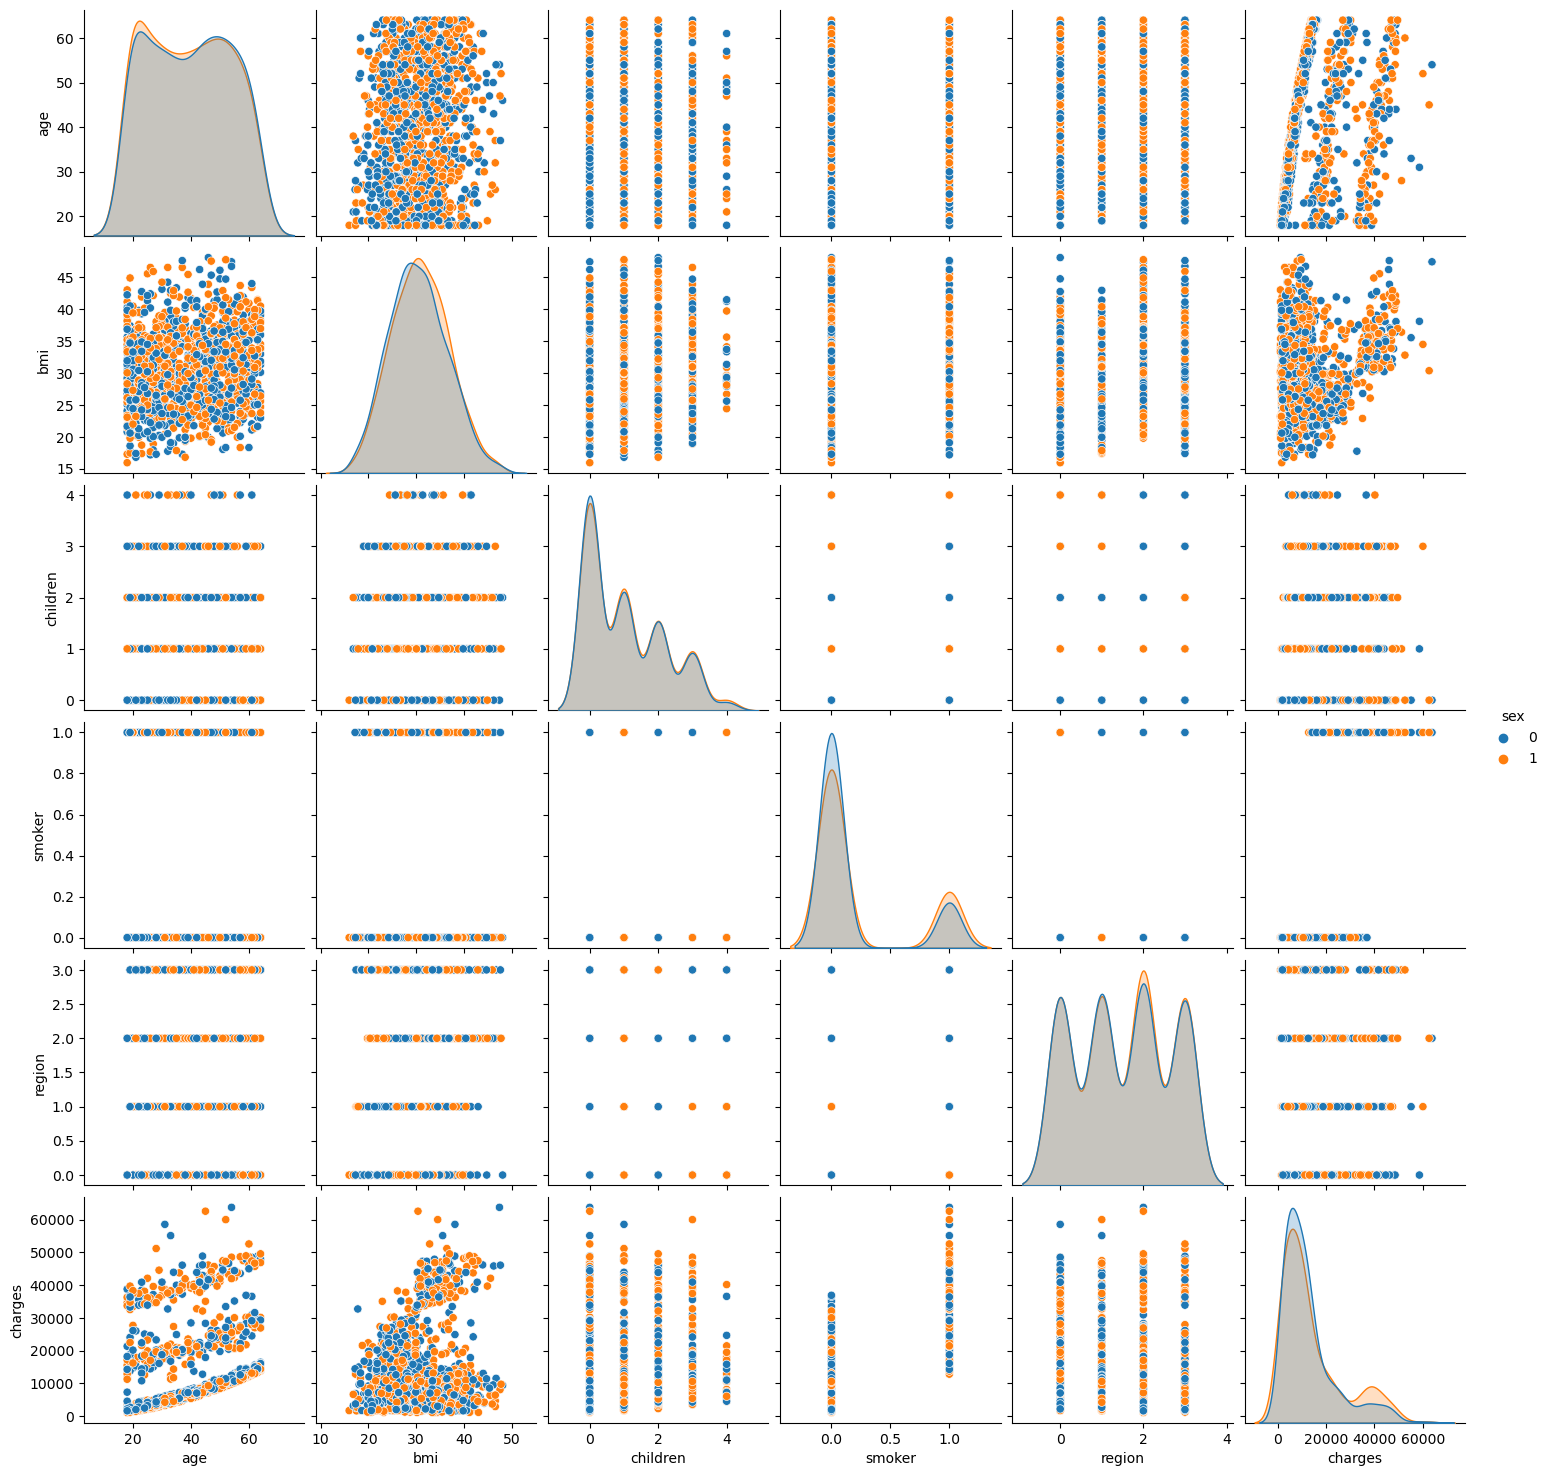

In [34]:
sns.pairplot(dataset,hue="sex")

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
print("x_train :",x_train.shape)
print('x_test :',x_test.shape)
print("y_train :",y_train.shape)
print('y_test :',y_test.shape)

x_train : (1052, 6)
x_test : (263, 6)
y_train : (1052,)
y_test : (263,)


In [37]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [39]:
models = {
    'lr': LinearRegression(),
    "lasso" : Lasso(),
    "ridge" : Ridge(),
    'rf': RandomForestRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    # make prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print(list(models.values())[i])
    #train data confusion metrics
    print('    r2 score:',r2_score(y_train,y_train_pred))
    print("    mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
    print('    mean_squared_error:',mean_squared_error(y_train,y_train_pred))
    print('    root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
    print("*"*40)
    
    #test data confusion metrics
    print('    r2 score:',r2_score(y_test,y_test_pred))
    print("    mean_absolute_error:" ,mean_absolute_error(y_test,y_test_pred))
    print('    mean_squared_error:',mean_squared_error(y_test,y_test_pred))
    print('    root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
    print("="*70,"\n")
    

LinearRegression()
    r2 score: 0.7410504813038535
    mean_absolute_error: 4307.7823216303805
    mean_squared_error: 37811470.2883547
    root_mean_squared_error: 6149.103210091265
****************************************
    r2 score: 0.7875009687055003
    mean_absolute_error: 3956.511070908003
    mean_squared_error: 32699132.613176048
    root_mean_squared_error: 5718.315539840037

Lasso()
    r2 score: 0.7410503947999225
    mean_absolute_error: 4308.110997445689
    mean_squared_error: 37811482.919545665
    root_mean_squared_error: 6149.104237167042
****************************************
    r2 score: 0.7875074425982826
    mean_absolute_error: 3956.8097772903166
    mean_squared_error: 32698136.417206015
    root_mean_squared_error: 5718.228433457867

Ridge()
    r2 score: 0.7410295675416956
    mean_absolute_error: 4317.446570289776
    mean_squared_error: 37814524.088571966
    root_mean_squared_error: 6149.351517727049
****************************************
    r2 sco

### Observetion 
* From above RandomForestRegressor have best accuracy(85%) and less mean_squared_error

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
rf = RandomForestRegressor(random_state=42)

In [42]:
parma_grid ={
    'n_estimators' : [50,80,100,130,150],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [8,10,12,14,16,18,20],
    'max_features':['sqrt', 'log2', None]
}

In [43]:
rf_cv = GridSearchCV(estimator=rf,param_grid=parma_grid,cv=5)
rf_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [8, 10, 12, 14, 16, 18, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 80, 100, 130, 150]})

In [44]:
rf_cv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_features': None,
 'n_estimators': 150}

In [45]:
# make prediction
y_train_pred = rf_cv.predict(x_train)
y_test_pred = rf_cv.predict(x_test)

In [46]:
    #train data confusion metrics
print('r2 score:',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score: 0.9196947059033489
mean_absolute_error: 1415.6465871834982
mean_squared_error: 11726074.089738382
root_mean_squared_error: 3424.335569090503


In [47]:
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:" ,mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: 0.8749158101302524
mean_absolute_error: 2089.8651065272747
mean_squared_error: 19247826.625120424
root_mean_squared_error: 4387.234507650625


In [48]:
def pred(x):
    X = np.array(x).reshape(1,-1)
    result = rf_cv.predict(X)
    return result

In [49]:
# ans : 4449.46200

x = [28,1,33.000,3,0,2]
pred(x)

array([4866.65396103])

In [50]:
# ans : 16884.92400
x = [19,0,27.900,0,1,3]
pred(x)

array([17128.89431])